In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.python.keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from keras.backend import clear_session
from keras.layers import Dense
from keras.preprocessing.text import one_hot
import os


In [11]:
### GET / FORMAT TARGET DATA ##########################################

# small set = 1000features / large set = 500features
posts_smallSet = np.array(pd.read_csv('vectorized_posts3', header=None))
posts_largeSet = np.array(pd.read_csv('vectorizedPosts_largeSet', header=None))

# get targets
df = pd.read_csv('mbti_1.csv', names=['type', 'posts'])
targets = np.array(df['type'].values[1:])

# convert classes to integer - 16 classes
targets[targets == 'ENFJ'] = 0
targets[targets == 'ENFP'] = 1
targets[targets == 'ENTJ'] = 2
targets[targets == 'ENTP'] = 3
targets[targets == 'ESFJ'] = 4
targets[targets == 'ESFP'] = 5
targets[targets == 'ESTJ'] = 6
targets[targets == 'ESTP'] = 7
targets[targets == 'INFJ'] = 8
targets[targets == 'INFP'] = 9
targets[targets == 'INTJ'] = 10
targets[targets == 'INTP'] = 11
targets[targets == 'ISFJ'] = 12
targets[targets == 'ISFP'] = 13
targets[targets == 'ISTJ'] = 14
targets[targets == 'ISTP'] = 15

print("Small Set: ",np.shape(posts_smallSet))
print("Large Set: ",np.shape(posts_largeSet))

Small Set:  (8675, 500)
Large Set:  (8675, 1000)


In [12]:
### FUNCTIONS ##########################################


def visualize(epochs, history):
    
    #Visualize epoch V J
    epoch=np.linspace(1,epochs,num=epochs)

    print("epoch vs J ->")
    fig, axes = plt.subplots()
    axes.plot(epoch, history)
    axes.set_xlabel('epoch')
    axes.set_ylabel('J')
    plt.show()
    
def format_split_data(file, targets):
    
    #split into train/test - 70/30% - shuffles data prior to split
    train, test, y_train, y_test = train_test_split(file, targets, train_size=0.7, test_size=0.3, random_state=1000)
    print("Train x / y: ", train.shape, y_train.shape)
    print("Test x / y: ", test.shape, y_test.shape)

    #convert to one-hot target encoding
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return train, test, y_train, y_test

def build_model(size):
        
    # Sequential groups linear stack of layers into a model
    model = Sequential()
    # First layer receives num features as input shape
    model.add(Dense(8, input_dim=size, activation='relu'))
    # output layer must output num classes (16)
    model.add(Dense(16, activation='softmax'))
    # to config the model w losses and metrics
    model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy())
    # This builds the model for the first time / trains
    model.summary()
    
    return model

def fit_model(x, y, e):
    
    history = model.fit(train, y_train, epochs=e, verbose=0)
    h = np.array(history.history['loss']) # history of loss @ ea epoch -> np array
    
    visualize(e, h) #chart J v epoch
    
    return h

def predict(test, y):
    #Generate class predictions & accuracy for the input samples
    yhat = model.predict(test, verbose=1)
    m = tf.keras.metrics.CategoricalAccuracy()
    m.update_state(y, yhat, sample_weight=None)
    
    return m.result().numpy()
    

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
Total params: 4,152
Trainable params: 4,152
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x153182940>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <bound method Reduce.result of <keras.metrics.Mean object at 0x1530e4c70>>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.step_function.<locals>.run_step at 0x1531ad5e0>. No

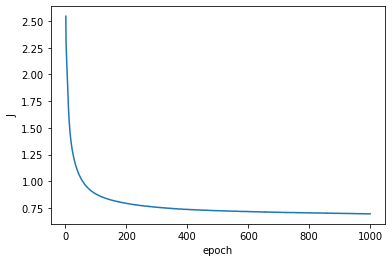

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153473e50>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153473e50>. Note that 

In [13]:
### SMALL SET - 500 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

 
train, test, y_train, y_test = format_split_data(posts_smallSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))
clear_session() 

Train x / y:  (6072, 500) (6072,)
Test x / y:  (2603, 500) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 4008      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
Total params: 4,152
Trainable params: 4,152
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x153a7b160>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in

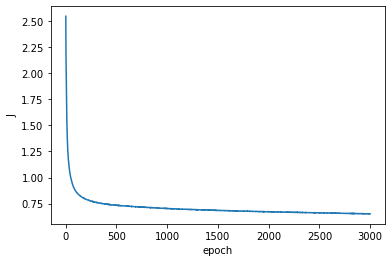

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153bc54c0>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153bc54c0>. Note that 

In [14]:
### SMALL SET - 500 FEATURES - 3000 EPOCHS ##########################################
epochs = 3000

clear_session() 
train, test, y_train, y_test = format_split_data(posts_smallSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))


Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 8008      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
Total params: 8,152
Trainable params: 8,152
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x153b32670>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them 

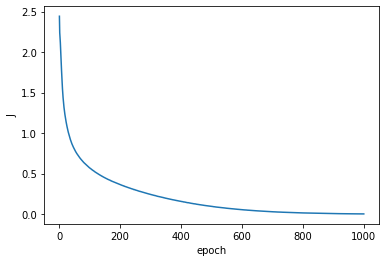

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153d114c0>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153d114c0>. Note that 

In [15]:
### LARGE SET - 1000 FEATURES - 1000 EPOCHS ##########################################
epochs = 1000

clear_session() 
train, test, y_train, y_test = format_split_data(posts_largeSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))


Train x / y:  (6072, 1000) (6072,)
Test x / y:  (2603, 1000) (2603,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 8008      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
Total params: 8,152
Trainable params: 8,152
Non-trainable params: 0
_________________________________________________________________
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x153d4e5e0>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them 

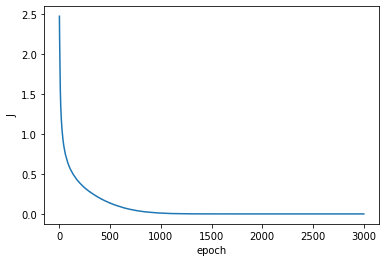

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153e91d30>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: lineno is out of bounds
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x153e91d30>. Note that 

In [16]:
### LARGE SET - 1000 FEATURES - 3000 EPOCHS ##########################################
epochs = 3000

clear_session() 
train, test, y_train, y_test = format_split_data(posts_largeSet, targets)
model = build_model(train.shape[1])
h = fit_model(train, y_train, epochs)
result = predict(test, y_test)

print("Accuracy {:.2%}: epochs {} - features {}".format(result, epochs, train.shape[1]))